In [0]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt 
import string
import os
from PIL import Image
import glob
import keras
import tensorflow as tf
from pickle import dump, load
from tqdm import tqdm_notebook as tqdm
from time import time

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.layers.merge import add
from keras.applications.inception_v3 import InceptionV3

from keras.preprocessing import image
from keras.models import Model
from keras import Input, layers
from keras import optimizers
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd drive/My\ Drive/SIH

/content/drive/My Drive/SIH


In [0]:
def define_model():
  model = Sequential()
  model.add(Dense(256, activation='relu', input_dim = 2048))
  model.add(Dropout(0.4))
  model.add(Dense(256, activation = 'relu'))
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))
  return model

In [0]:
model = define_model()

model.compile(optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])

model.load_weights('Models/my_model.h5')

In [0]:
model_new = InceptionV3()
model_new = Model(model_new.input, model_new.layers[-2].output)
model_new.load_weights('Models/inception.h5')

In [0]:
# # Load the inception v3 model
# inception = InceptionV3(weights='imagenet')
# inception = Model(inception.input, inception.layers[-2].output)

In [0]:
# # Create a new model, by removing the last layer (output layer) from the inception v3
# inception = Model(model.input, model.layers[-2].output)

In [0]:
try:
    import dill as pickle
except ImportError:
    import pickle

In [0]:
def preprocess(image_path):
    # Convert all the images to size 299x299 as expected by the inception v3 model
    img = image.load_img(image_path, target_size=(299, 299))
    
    x = image.img_to_array(img)
    # Add one more dimension
    x = np.expand_dims(x, axis=0)
    
    x = preprocess_input(x)
    return x

In [0]:
# Function to encode a given image into a vector of size (2048, )
def encode(image):
    image = preprocess(image) 
    v = model_new.predict(image) 
    v = np.reshape(v, v.shape[1]) 
    return v

In [0]:
def predict(filename):
  x = plt.imread(filename)
  plt.imshow(x)
  v = encode(filename)
  # v = v.astype('float32')
  # v /= 255
  pred =  model.predict(v.reshape(1, v.shape[0]))
  #return pred[0]
  if pred[0] == 1:
    return "Garbage in the Image"
  else:
    return "Clean area"

'Garbage in the Image'

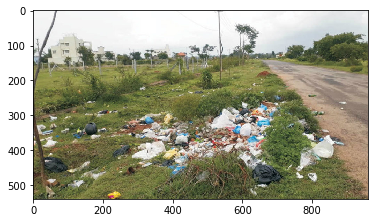

In [0]:
predict("dataset/Garbage/p3-jy23-18.jpg")


'Garbage in the Image'

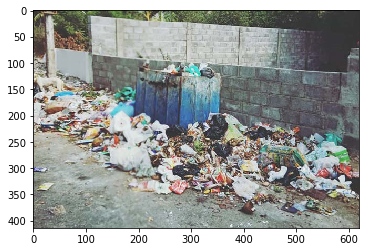

In [0]:
predict('abcd.jpg')

'Garbage in the Image'

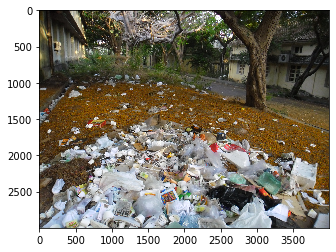

In [0]:
predict("Garbage_on_a_roadside.jpg")

In [0]:
# !pip3 freeze 

## Real Time detection


In [0]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

In [0]:
from google.colab.patches import cv2_imshow

Frame 0 : Garbage in the Image
Frame 1 : Garbage in the Image
Frame 2 : Garbage in the Image
Frame 3 : Garbage in the Image
Frame 4 : Garbage in the Image
Frame 5 : Garbage in the Image
Frame 6 : Garbage in the Image
Frame 7 : Garbage in the Image
Frame 8 : Garbage in the Image
Frame 9 : Garbage in the Image
Frame 10 : Garbage in the Image
Frame 11 : Garbage in the Image
Frame 12 : Garbage in the Image
Frame 13 : Garbage in the Image
Frame 14 : Garbage in the Image
Frame 15 : Garbage in the Image
Frame 16 : Garbage in the Image
Frame 17 : Garbage in the Image
Frame 18 : Garbage in the Image
Frame 19 : Garbage in the Image
Frame 20 : Garbage in the Image
Frame 21 : Garbage in the Image
Frame 22 : Garbage in the Image
Frame 23 : Garbage in the Image
Frame 24 : Garbage in the Image
Frame 25 : Garbage in the Image
Frame 26 : Garbage in the Image
Frame 27 : Garbage in the Image
Frame 28 : Garbage in the Image
Frame 29 : Garbage in the Image
Frame 30 : Garbage in the Image
Frame 31 : Garbage

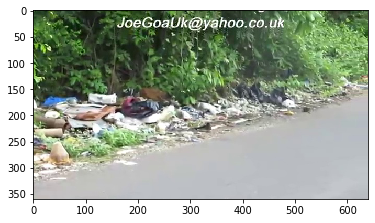

In [52]:
count = 0
videoFile = "sample.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
frame
x=1

while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    #cv2_imshow(frame)
    
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
      filename ="frame.jpg" 
      cv2.imwrite(filename, frame)
    print("Frame " + str(count) + " : " + predict(filename))
    count+=1
cap.release()
print ("Done!")